<a href="https://colab.research.google.com/github/sudeeshsukumaran/AutoBox/blob/main/FaceNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install MTCNN

     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [2]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from PIL import Image 
from numpy import savez_compressed
from numpy import asarray
from os import listdir
from mtcnn.mtcnn import MTCNN

Cloning into 'images'...
remote: Enumerating objects: 485, done.
remote: Counting objects: 100% (485/485), done.
remote: Compressing objects: 100% (478/478), done.
remote: Total 485 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (485/485), 3.42 MiB | 8.43 MiB/s, done.
Resolving deltas: 100% (4/4), done.


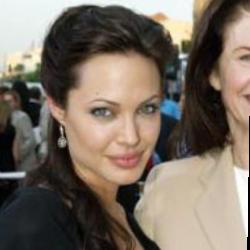

In [3]:
!git clone https://github.com/sudeeshsukumaran/AutoBox.git images
from PIL import Image
Image.open('images/Images/Train/Angelina_Jolie/Angelina_Jolie_0003.jpg')

In [4]:
#Method to extract Face
def extract_image(image):
  img1 = Image.open(image)            #open the image
  img1 = img1.convert('RGB')          #convert the image to RGB format 
  pixels = asarray(img1)              #convert the image to numpy array
  detector = MTCNN()                  #assign the MTCNN detector
  f = detector.detect_faces(pixels)
  #fetching the (x,y)co-ordinate and (width-->w, height-->h) of the image
  x1,y1,w,h = f[0]['box']             
  x1, y1 = abs(x1), abs(y1)
  x2 = abs(x1+w)
  y2 = abs(y1+h)
  #locate the co-ordinates of face in the image
  store_face = pixels[y1:y2,x1:x2]
  plt.imshow(store_face)
  image1 = Image.fromarray(store_face,'RGB')    #convert the numpy array to object
  image1 = image1.resize((160,160))             #resize the image
  face_array = asarray(image1)                  #image to array
  return face_array


#Method to fetch the face
def load_faces(directory):
  face = []
  i=1
  for filename in listdir(directory):
    path = directory + filename
    faces = extract_image(path)
    face.append(faces)
  return face


#Method to get the array of face data(trainX) and it's labels(trainY)
def load_dataset(directory):
  x, y = [],[]
  i=1
  for subdir in listdir(directory):
    path = directory + subdir + '/'
    #load all faces in subdirectory
    faces = load_faces(path)
    #create labels
    labels = [subdir for _ in range(len(faces))]
    #summarize
    print("%d There are %d images in the class %s:"%(i,len(faces),subdir))
    x.extend(faces)
    y.extend(labels)
    i=i+1
  return asarray(x),asarray(y)

1 There are 23 images in the class Bill_Clinton:
2 There are 15 images in the class Jennifer_Lopez:
3 There are 25 images in the class David_Beckham:
4 There are 18 images in the class Winona_Ryder:
5 There are 18 images in the class Atal_Bihari_Vajpayee:
6 There are 16 images in the class Naomi_Watts:
7 There are 14 images in the class Angelina_Jolie:
8 There are 38 images in the class Vladimir_Putin:
9 There are 12 images in the class Michael_Schumacher:
10 There are 36 images in the class Arnold_Schwarzenegger:
11 There are 39 images in the class Serena_Williams:
12 There are 36 images in the class George_W_Bush:
13 There are 15 images in the class Jennifer_Aniston:
14 There are 17 images in the class Tiger_Woods:
15 There are 11 images in the class Bill_Gates:
(333, 160, 160, 3) (333,)


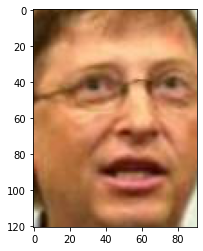

In [5]:
#load the datasets
trainX,trainY = load_dataset('images/Images/Train/')
print(trainX.shape,trainY.shape)
#compress the data
savez_compressed('celeb-dataset.npz',trainX,trainY)

In [8]:
from numpy import load
from numpy import asarray
from numpy import expand_dims
from numpy import savez_compressed
from numpy import reshape
from keras.models import load_model 

In [12]:
#!pip install keras-facenet

  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10386 sha256=7da91180896a05426482f7a094b423b6ec26a28e3a95968a4be22f720d9fdbd7
  Stored in directory: /root/.cache/pip/wheels/2b/76/1a/a29ceb07bfca098e2b0bc8690d550753a0384cbed26d5f47ee
Successfully built keras-facenet


In [13]:
#Generalize the data and extract the embeddings
def extract_embeddings(model,face_pixels):
  face_pixels = face_pixels.astype('float32')  #convert the entire data to float32(base)
  mean = face_pixels.mean()                    #evaluate the mean of the data
  std  = face_pixels.std()                     #evaluate the standard deviation of the data
  face_pixels = (face_pixels - mean)/std       
  samples = expand_dims(face_pixels,axis=0)    #expand the dimension of data 
  yhat = model.predict(samples)
  return yhat[0]

#load the compressed dataset and facenet keras model
data = load('celeb-dataset.npz')
trainx, trainy = data['arr_0'],data['arr_1']
print(trainx.shape, trainy.shape)
model = load_model('facenet_keras.h5')

#get the face embeddings
new_trainx = list()
for train_pixels in trainx:
  embeddings = extract_embeddings(model,train_pixels)
  new_trainx.append(embeddings)
new_trainx = asarray(new_trainx)             #convert the embeddings into numpy array
print(new_trainx.shape)

#compress the 128 embeddings of each face 
savez_compressed('celeb-embeddings.npz',new_trainx,trainy)

(333, 160, 160, 3) (333,)


OSError: ignored